In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import sklearn

In [3]:
student_data = pd.read_csv("~/Desktop/DA485 - Capstone/Portugal_Student_Data.csv", sep = ";")
print(student_data.head)


<bound method NDFrame.head of       Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                

In [4]:
print("Data Types:", "\n", student_data.dtypes)

Data Types: 
 Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64


In [5]:
print(student_data.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

In [6]:
student_data['GDP'] = student_data['GDP'] / 100
print(student_data['GDP'].head())

student_data['Inflation rate'] = student_data['Inflation rate'] / 100
print(student_data['Inflation rate'].head())

student_data['Unemployment rate'] = student_data['Unemployment rate'] / 100
print(student_data['Unemployment rate'].head())

0    0.0174
1    0.0079
2    0.0174
3   -0.0312
4    0.0079
Name: GDP, dtype: float64
0    0.014
1   -0.003
2    0.014
3   -0.008
4   -0.003
Name: Inflation rate, dtype: float64
0    0.108
1    0.139
2    0.108
3    0.094
4    0.139
Name: Unemployment rate, dtype: float64


/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


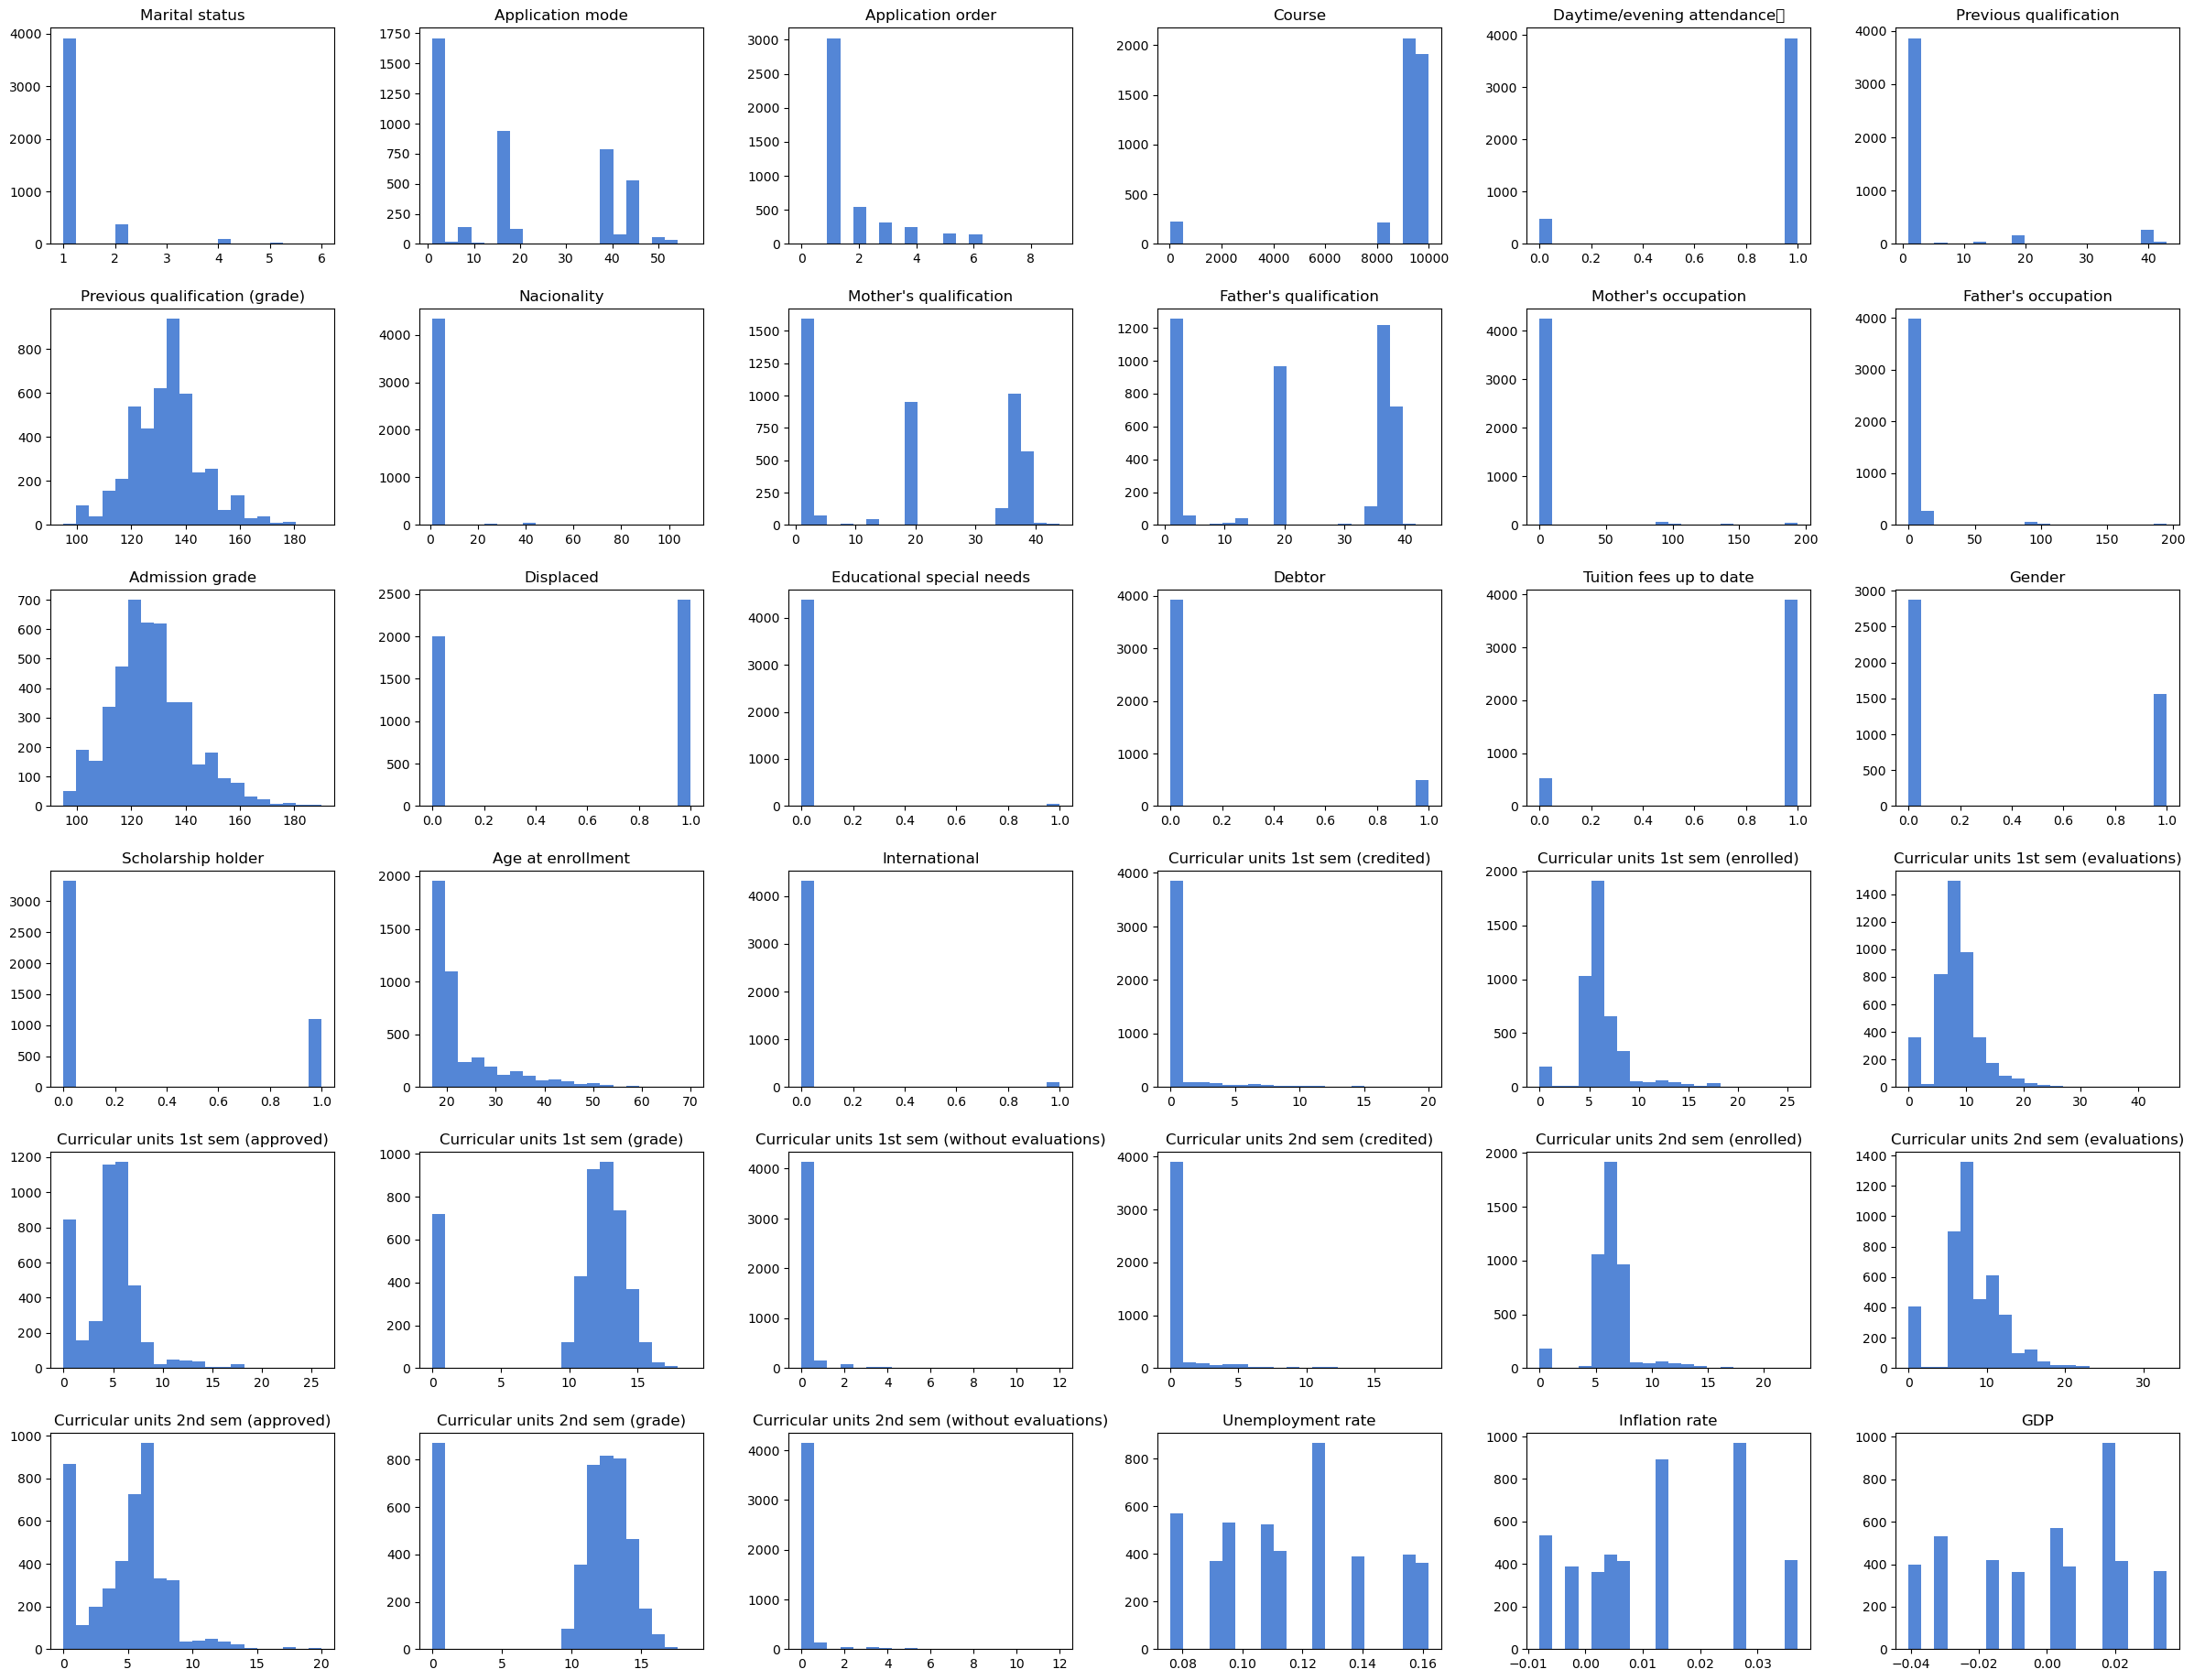

<function matplotlib.pyplot.show(close=None, block=None)>

In [7]:
student_data[student_data.columns].hist(bins= 20, figsize=(30,23), color='#5486d6')
for ax in plt.gcf().get_axes():
    ax.grid(False)

plt.show()
plt.show

In [8]:
from scipy.stats import shapiro
stat, p = shapiro(student_data['Age at enrollment'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.707, p=0.000
Sample does not look Gaussian (reject H0)


In [9]:
continuous_data = student_data[['Previous qualification (grade)', 'Age at enrollment', 
                                'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)',
                                'Curricular units 2nd sem (approved)', 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)', 
                                'Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)',
                                'Unemployment rate', 'Inflation rate', 'GDP']]
print(continuous_data)

      Previous qualification (grade)  Age at enrollment  Admission grade  \
0                              122.0                 20            127.3   
1                              160.0                 19            142.5   
2                              122.0                 19            124.8   
3                              122.0                 20            119.6   
4                              100.0                 45            141.5   
...                              ...                ...              ...   
4419                           125.0                 19            122.2   
4420                           120.0                 18            119.0   
4421                           154.0                 30            149.5   
4422                           180.0                 20            153.8   
4423                           152.0                 22            152.0   

      Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
0          

In [10]:
from scipy import stats
def shapiro_test_multiple(data):
    results = []
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            shapiro_result = stats.shapiro(data[column].dropna())
            results.append({
                'Variable': column,
                'Statistic': shapiro_result.statistic,
                'P-value': shapiro_result.pvalue,
                'Reject Null': shapiro_result.pvalue < alpha
            })
    return pd.DataFrame(results)

# Example usage with a Pandas DataFrame
data = continuous_data
shapiro_results = shapiro_test_multiple(data)
print(shapiro_results)

                                  Variable  Statistic       P-value  \
0           Previous qualification (grade)   0.979897  1.443189e-24   
1                        Age at enrollment   0.707169  2.421442e-66   
2                          Admission grade   0.980482  3.176984e-24   
3         Curricular units 1st sem (grade)   0.684601  8.402219e-68   
4         Curricular units 2nd sem (grade)   0.704320  1.565443e-66   
5      Curricular units 1st sem (approved)   0.885822  3.065710e-49   
6      Curricular units 2nd sem (approved)   0.918235  8.330056e-44   
7      Curricular units 1st sem (enrolled)   0.730027  9.188823e-65   
8      Curricular units 2nd sem (enrolled)   0.785451  2.101086e-60   
9   Curricular units 1st sem (evaluations)   0.902764  1.385502e-46   
10  Curricular units 2nd sem (evaluations)   0.932363  7.264400e-41   
11                       Unemployment rate   0.934738  2.530875e-40   
12                          Inflation rate   0.923822  1.071902e-42   
13    

In [11]:
student_data['Age at enrollment'] = np.log(student_data['Age at enrollment'])

In [12]:
student_data.columns = student_data.columns.str.replace("'", "")
print(student_data)

      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1             

/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


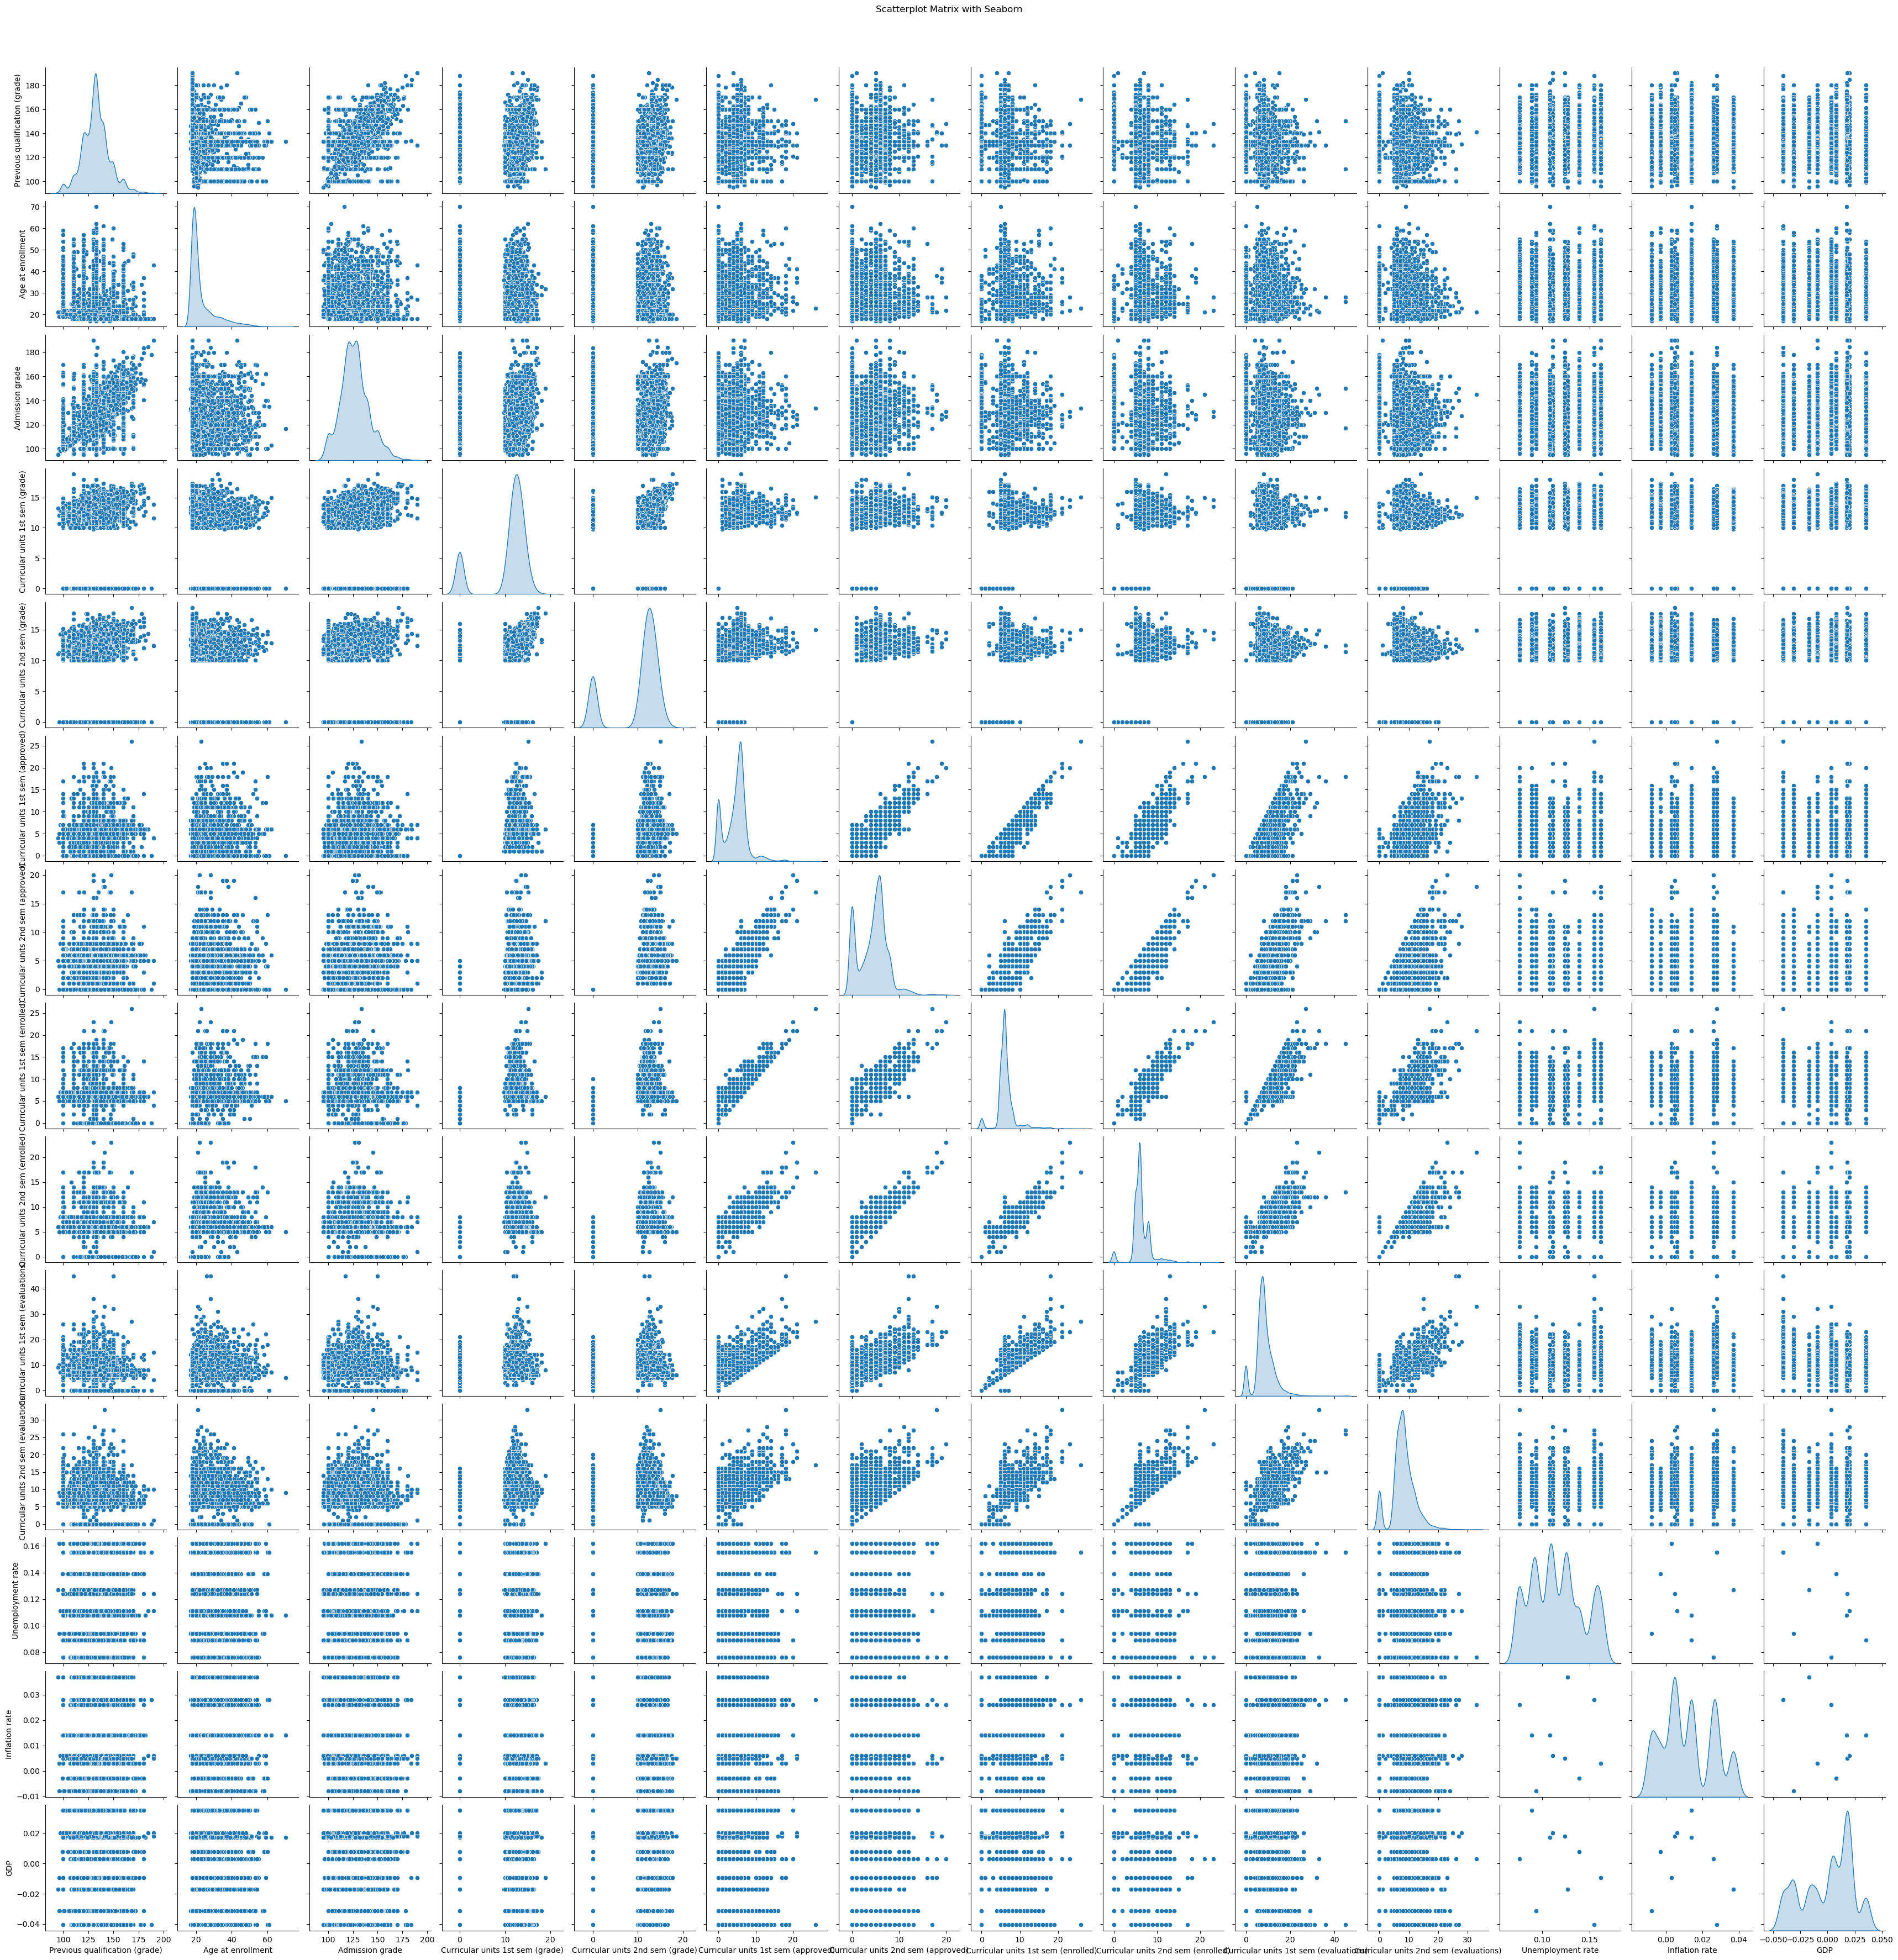

In [13]:
import seaborn as sns
sns.pairplot(continuous_data, diag_kind='kde')
plt.suptitle('Scatterplot Matrix with Seaborn', y=1.02)
plt.show()

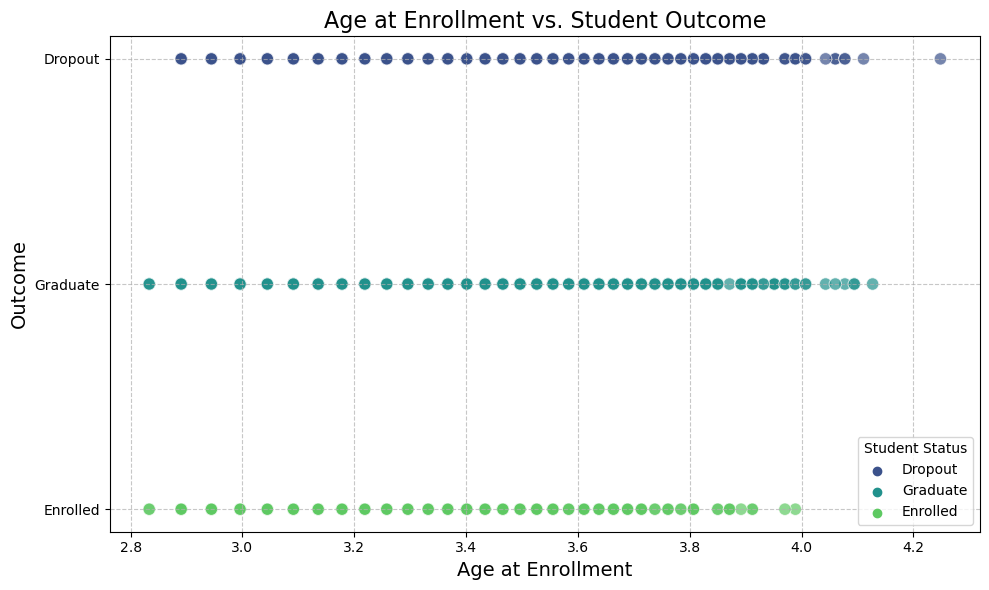

In [14]:
plt.figure(figsize=(10, 6))

# Method 1: Using Seaborn (recommended for categorical targets)
sns.scatterplot(
    data=student_data,
    x='Age at enrollment',
    y='Target',
    hue='Target',  # Color by target
    palette='viridis',  # Color palette
    s=80,  # Point size
    alpha=0.7  # Transparency
)

plt.title('Age at Enrollment vs. Student Outcome', fontsize=16)
plt.xlabel('Age at Enrollment', fontsize=14)
plt.ylabel('Outcome', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Student Status')
plt.tight_layout()
plt.show()

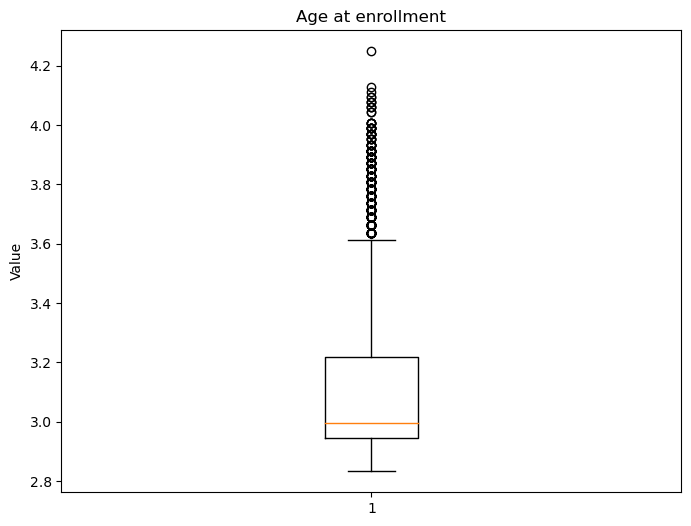

In [15]:
# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(student_data['Age at enrollment'])
plt.title('Age at enrollment')
plt.ylabel('Value')
plt.show()

<Axes: >

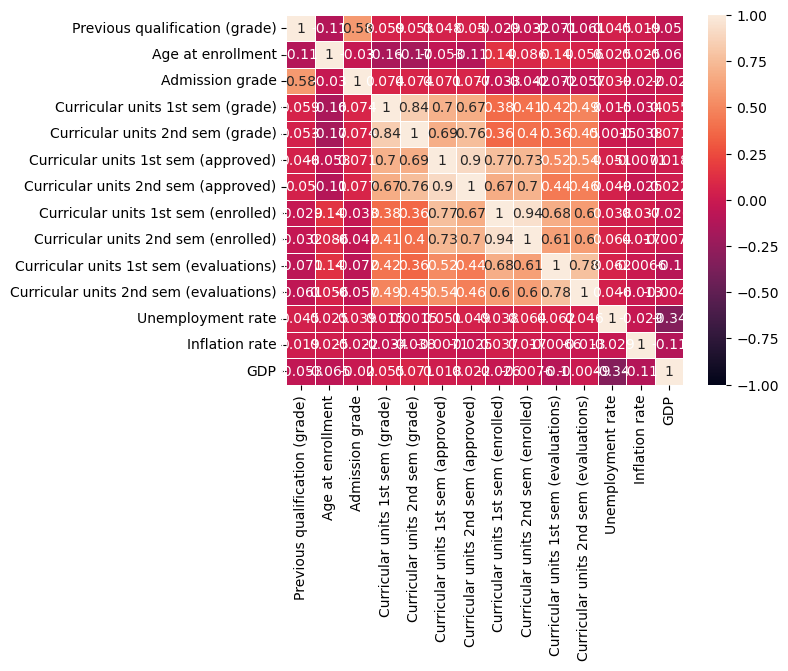

In [16]:
correlations = continuous_data.corr()
sns.heatmap(correlations, annot=True, vmin=-1, vmax=1, linewidth=.5)

In [17]:
df_group_by_type = student_data.groupby('Target')['Curricular units 1st sem (grade)'].apply(np.mean)
df_group_by_type

Target
Dropout      7.256656
Enrolled    11.125257
Graduate    12.643655
Name: Curricular units 1st sem (grade), dtype: float64

In [18]:
from scipy import stats
group1 = student_data[student_data['Target'] == 'Dropout']['Curricular units 1st sem (grade)']
group2 = student_data[student_data['Target'] == 'Graduate']['Curricular units 1st sem (grade)']
t_statistic, p_value = stats.ttest_ind(group1, group2, alternative='less')
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -36.66157442800798
p-value: 6.645336697163824e-251


In [19]:
from scipy import stats
group1 = student_data[student_data['Target'] == 'Dropout']['Curricular units 2nd sem (grade)']
group2 = student_data[student_data['Target'] == 'Graduate']['Curricular units 2nd sem (grade)']
t_statistic, p_value = stats.ttest_ind(group1, group2, alternative='less')
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -45.80885206007108
p-value: 0.0


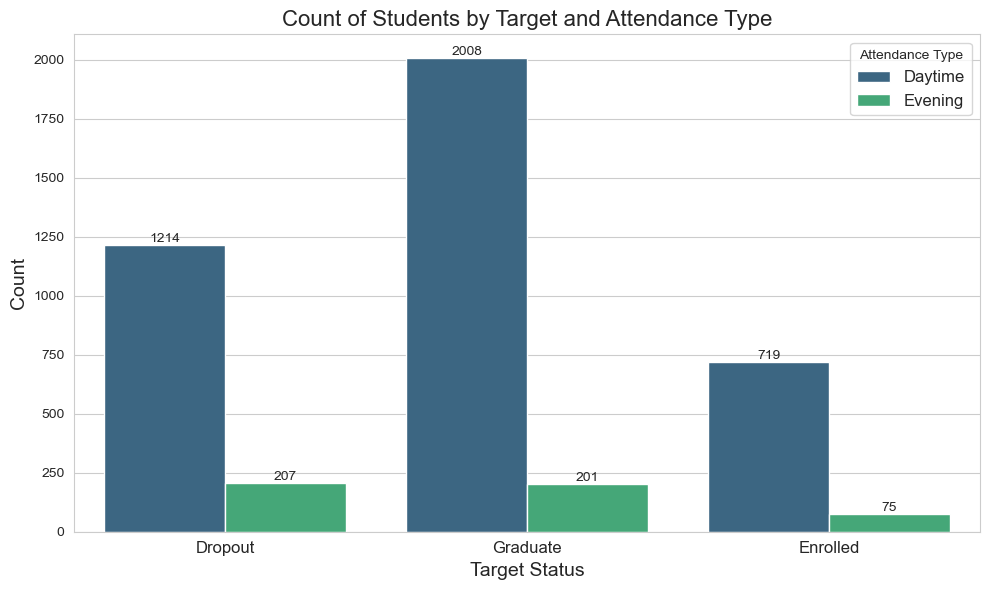

In [20]:
# Set up the plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the count plot (histogram)
ax = sns.countplot(x='Target', hue='Daytime/evening attendance\t', data=student_data, palette='viridis',
                   hue_order=[1, 0])

# Add labels and title
plt.title('Count of Students by Target and Attendance Type', fontsize=16)
plt.xlabel('Target Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Daytime', 'Evening'], title='Attendance Type', fontsize=12)
# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

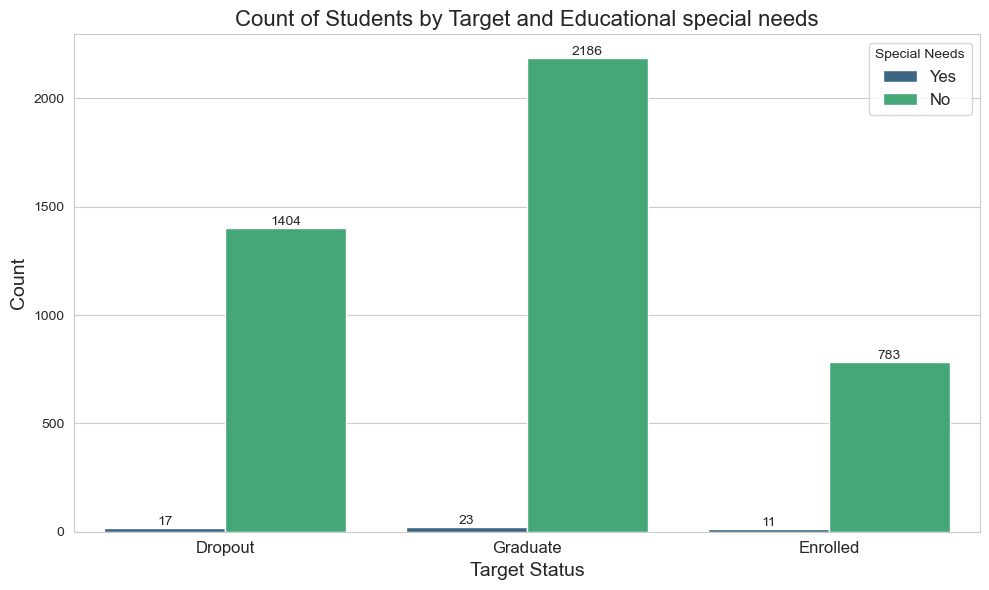

In [21]:
# Set up the plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the count plot (histogram)
ax = sns.countplot(x='Target', hue='Educational special needs', data=student_data, palette='viridis',
                   hue_order=[1, 0])

# Add labels and title
plt.title('Count of Students by Target and Educational special needs', fontsize=16)
plt.xlabel('Target Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Yes', 'No'], title='Special Needs', fontsize=12)
# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

OUTLIER DETECTION SUMMARY
Total features analyzed: 36
Total outliers found: 10588
Features with outliers: 28

FEATURES WITH MOST OUTLIERS:
----------------------------------------
Scholarship holder: 1099 outliers
Curricular units 2nd sem (grade): 877 outliers
Curricular units 1st sem (grade): 726 outliers
Previous qualification: 707 outliers
Curricular units 1st sem (credited): 577 outliers
Application order: 541 outliers
Curricular units 2nd sem (credited): 530 outliers
Tuition fees up to date: 528 outliers
Marital status: 505 outliers
Debtor: 503 outliers


/var/folders/gh/v4rcgtfx6dzdn9rmvp4_33l80000gn/T/ipykernel_27115/2846534.py:101: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


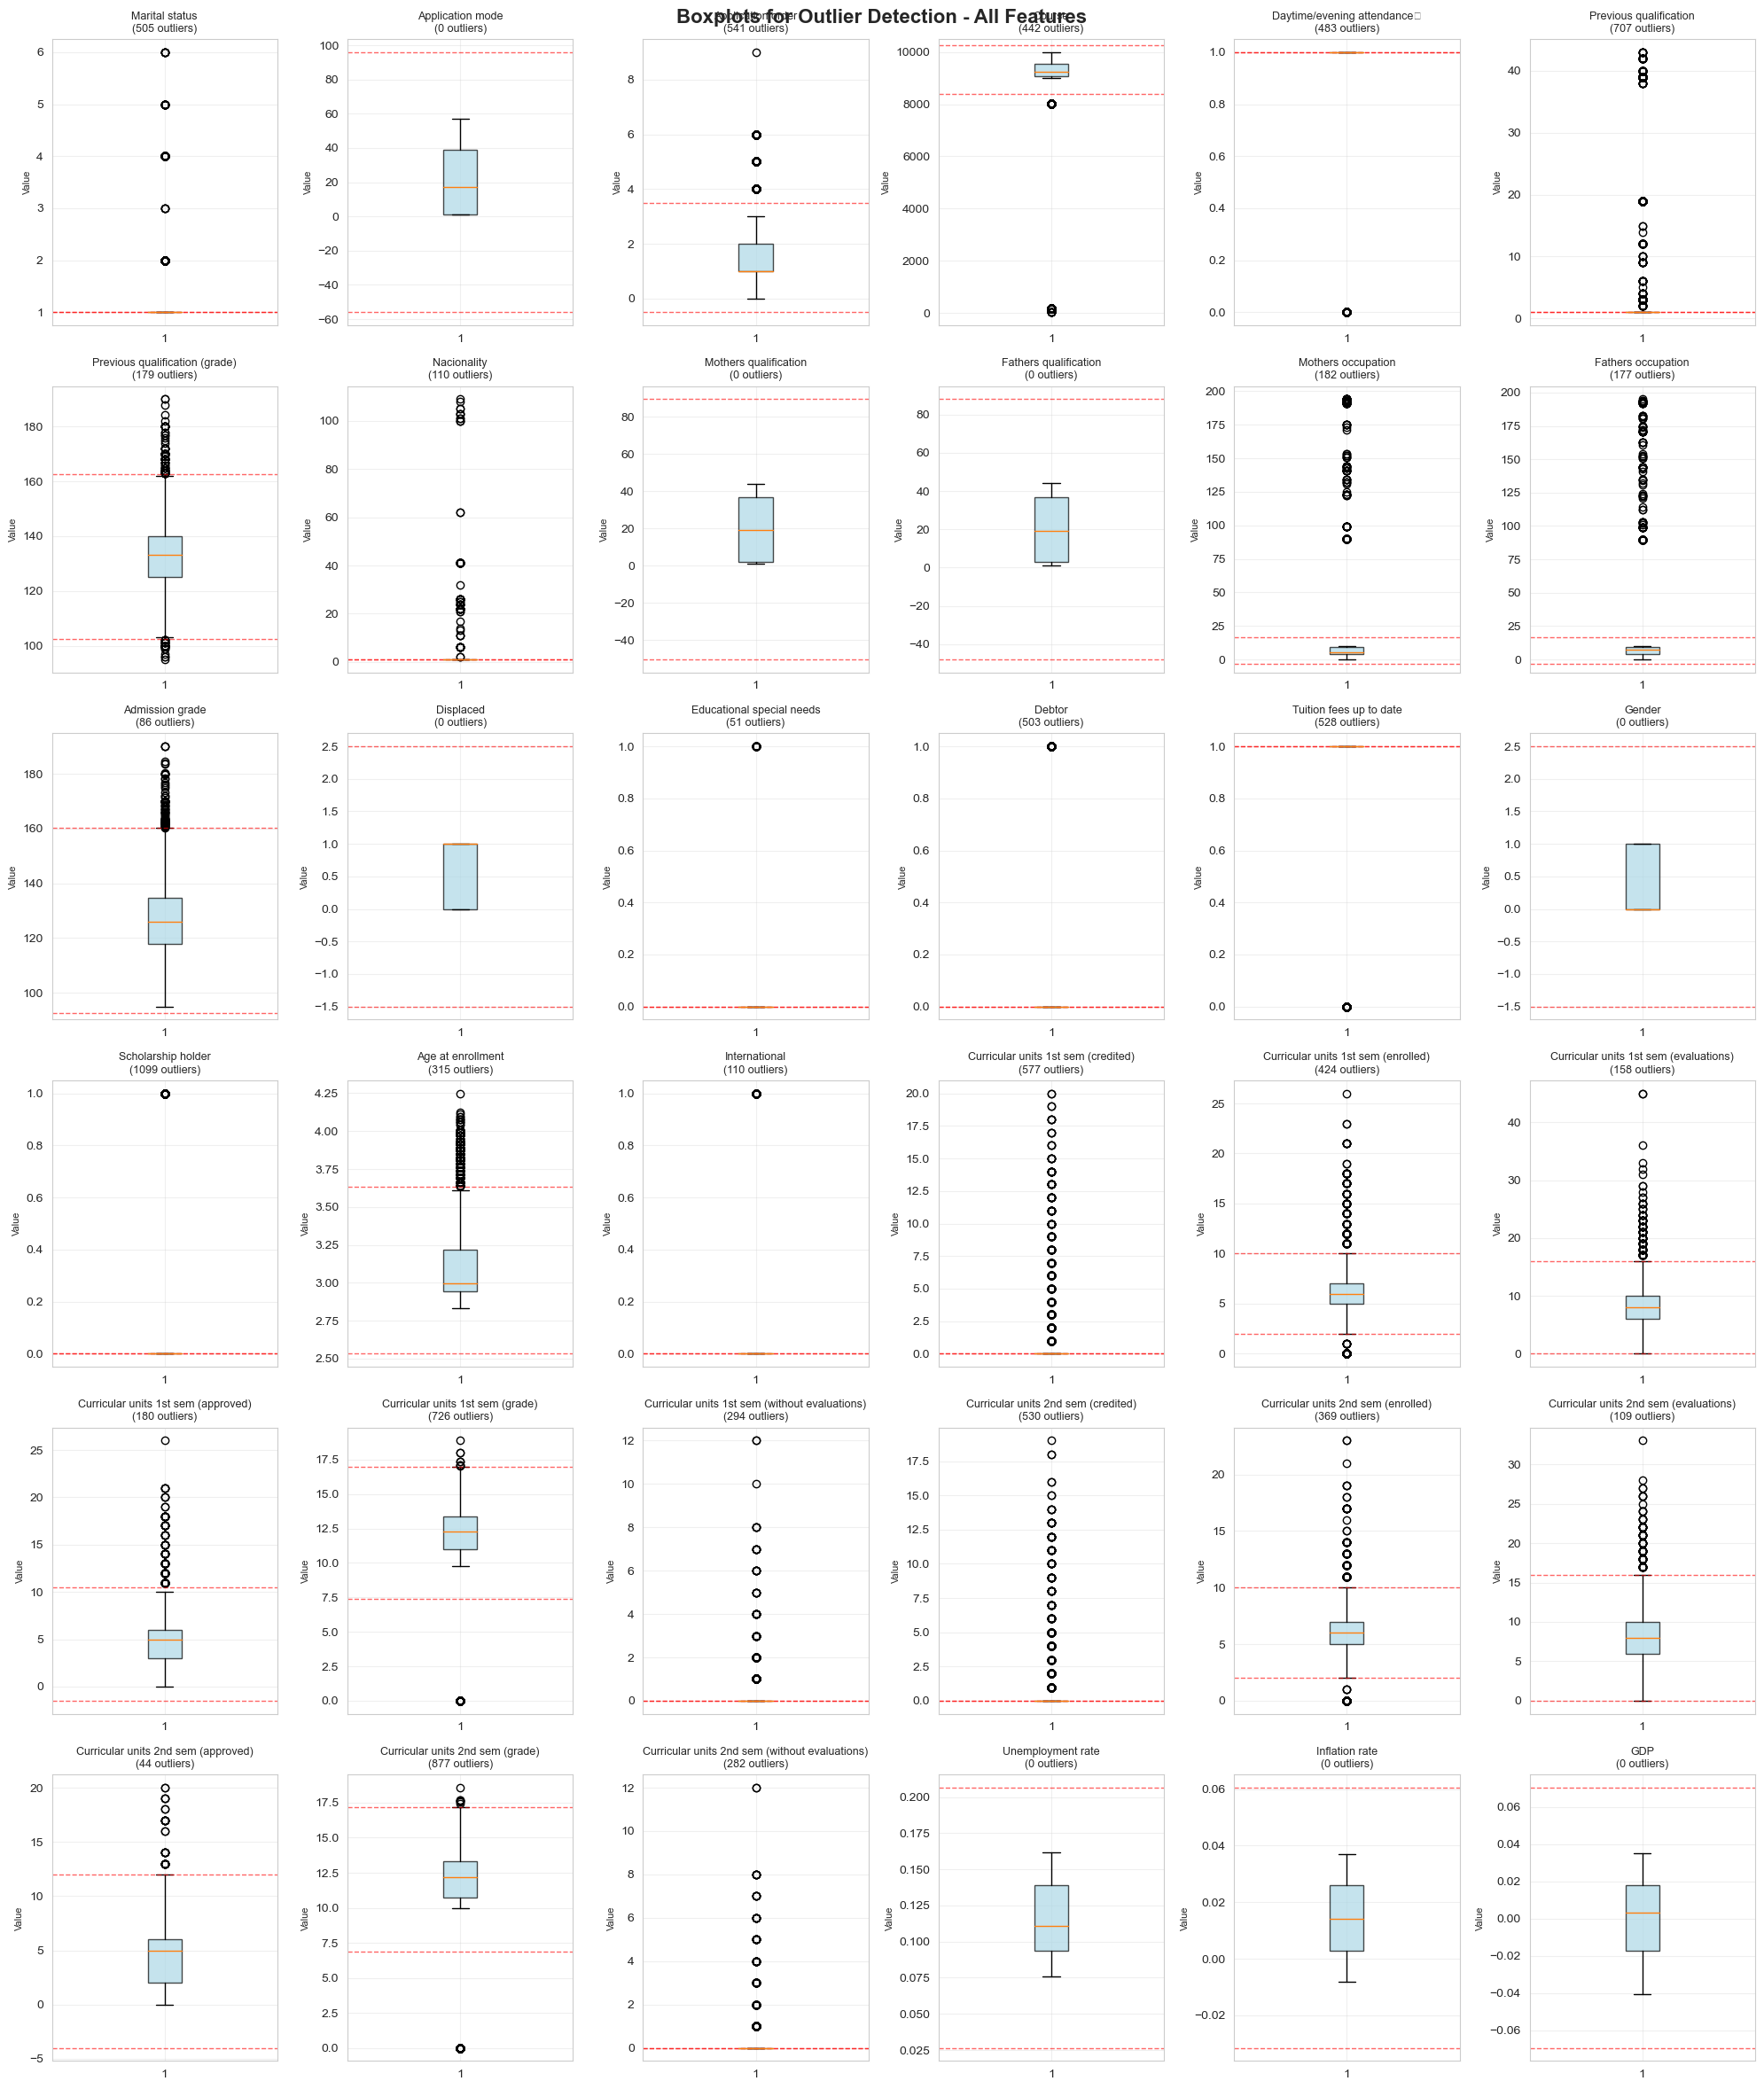

/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


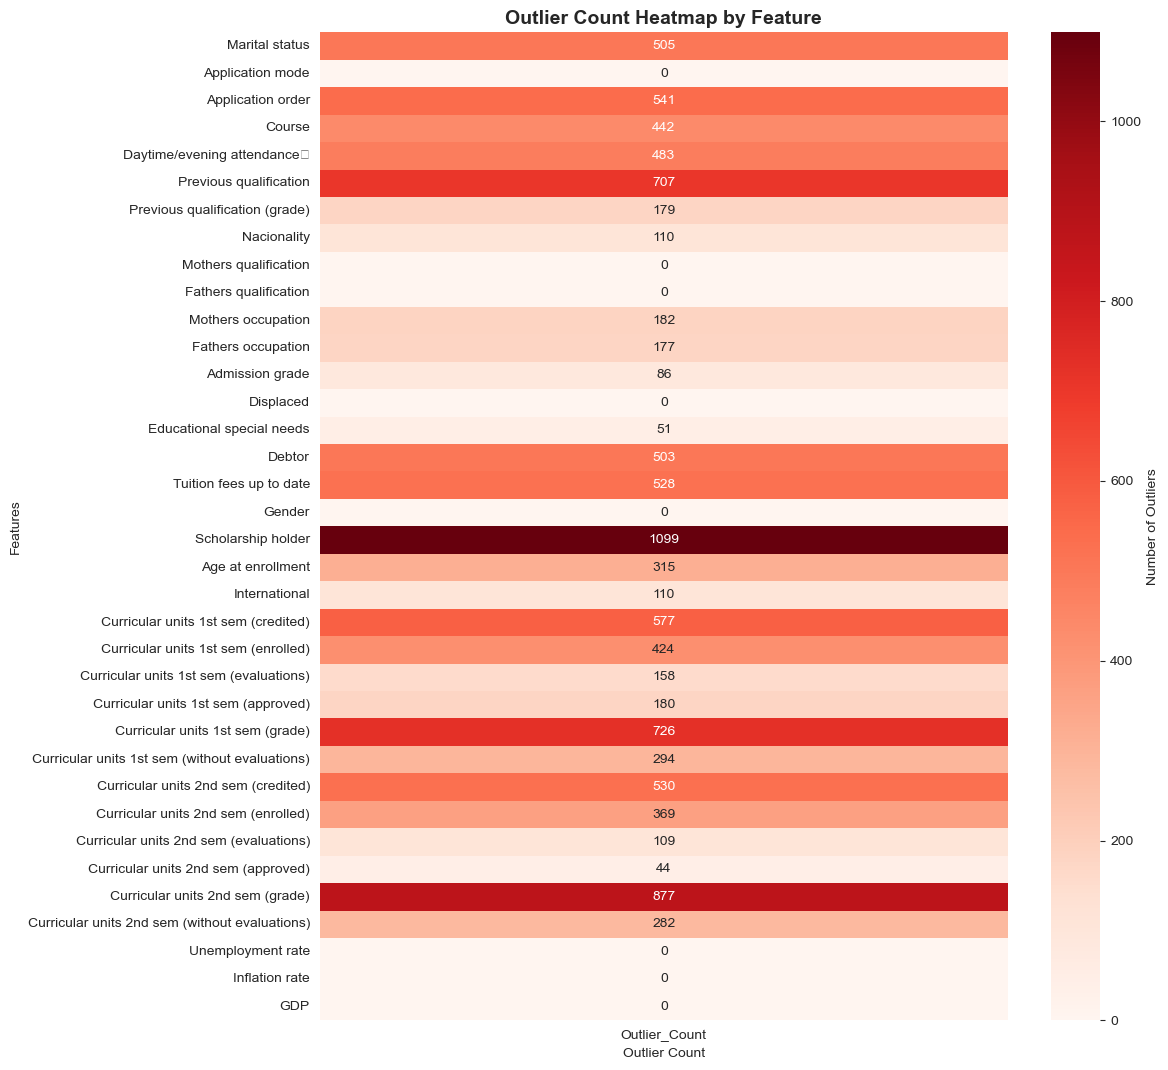


DETAILED OUTLIER VALUES (Top 5 features):

SCHOLARSHIP HOLDER:
  Outlier indices: [6, 8, 11, 13, 14, 20, 23, 25, 47, 48, 49, 50, 51, 52, 61, 62, 66, 76, 77, 78, 85, 86, 97, 111, 116, 123, 127, 130, 135, 137, 138, 141, 143, 144, 145, 149, 156, 157, 159, 161, 165, 175, 181, 187, 190, 204, 207, 209, 210, 211, 212, 213, 216, 218, 220, 221, 223, 224, 227, 229, 233, 235, 236, 237, 242, 244, 246, 249, 251, 255, 258, 260, 267, 268, 269, 270, 278, 279, 280, 281, 283, 288, 291, 293, 294, 295, 296, 301, 302, 312, 313, 316, 318, 321, 334, 337, 351, 353, 358, 363, 365, 366, 368, 371, 372, 377, 378, 380, 383, 389, 395, 397, 400, 410, 414, 418, 420, 430, 431, 432, 433, 435, 436, 437, 443, 445, 446, 449, 451, 459, 461, 467, 468, 469, 470, 471, 479, 481, 484, 485, 488, 489, 504, 520, 523, 530, 542, 543, 544, 577, 585, 587, 592, 596, 604, 606, 607, 609, 610, 614, 615, 616, 618, 623, 624, 630, 632, 633, 634, 635, 636, 639, 645, 653, 655, 665, 667, 670, 672, 679, 681, 682, 705, 730, 751, 752, 754, 770, 7

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Identify outliers using IQR method
def detect_outliers_iqr(student_data):
    """
    Detect outliers using IQR method for all numeric columns
    Returns dictionary with outlier information for each feature
    """
    numeric_cols = student_data.select_dtypes(include=[np.number]).columns
    outlier_results = {}
    
    for col in numeric_cols:
        Q1 = student_data[col].quantile(0.25)
        Q3 = student_data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = student_data[(student_data[col] < lower_bound) | (student_data[col] > upper_bound)][col]
        
        outlier_results[col] = {
            'outliers_count': len(outliers),
            'outliers_indices': outliers.index.tolist(),
            'outliers_values': outliers.tolist(),
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    
    return outlier_results

# Detect outliers in your data
outlier_info = detect_outliers_iqr(student_data)

# Print summary
print("OUTLIER DETECTION SUMMARY")
print("=" * 50)
total_outliers = sum(info['outliers_count'] for info in outlier_info.values())
features_with_outliers = sum(1 for info in outlier_info.values() if info['outliers_count'] > 0)

print(f"Total features analyzed: {len(outlier_info)}")
print(f"Total outliers found: {total_outliers}")
print(f"Features with outliers: {features_with_outliers}")

# Show features with most outliers
print(f"\nFEATURES WITH MOST OUTLIERS:")
print("-" * 40)
sorted_features = sorted(outlier_info.items(), key=lambda x: x[1]['outliers_count'], reverse=True)

for feature, info in sorted_features[:10]:  # Top 10
    if info['outliers_count'] > 0:
        print(f"{feature}: {info['outliers_count']} outliers")

# Create boxplots for all features
numeric_cols = student_data.select_dtypes(include=[np.number]).columns
n_cols = len(numeric_cols)

# Calculate subplot dimensions
cols = 6  # Number of columns in the grid
rows = (n_cols + cols - 1) // cols

# Create the plots
fig, axes = plt.subplots(rows, cols, figsize=(20, 4*rows))
fig.suptitle('Boxplots for Outlier Detection - All Features', fontsize=16, fontweight='bold')

# Flatten axes array for easier indexing
axes = axes.flatten() if n_cols > 1 else [axes]

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    
    # Create boxplot
    box_plot = ax.boxplot(student_data[col].dropna(), patch_artist=True)
    
    # Customize appearance
    box_plot['boxes'][0].set_facecolor('lightblue')
    box_plot['boxes'][0].set_alpha(0.7)
    
    # Add title with outlier count
    outlier_count = outlier_info[col]['outliers_count']
    ax.set_title(f'{col}\n({outlier_count} outliers)', fontsize=9)
    ax.set_ylabel('Value', fontsize=8)
    ax.grid(True, alpha=0.3)
    
    # Add outlier boundary lines
    info = outlier_info[col]
    ax.axhline(y=info['lower_bound'], color='red', linestyle='--', alpha=0.6, linewidth=1)
    ax.axhline(y=info['upper_bound'], color='red', linestyle='--', alpha=0.6, linewidth=1)

# Hide empty subplots
for i in range(n_cols, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Create a summary heatmap showing outlier counts
outlier_counts = [outlier_info[col]['outliers_count'] for col in numeric_cols]
outlier_data = pd.DataFrame({
    'Feature': numeric_cols,
    'Outlier_Count': outlier_counts
}).set_index('Feature')

plt.figure(figsize=(12, max(8, len(numeric_cols) * 0.3)))
sns.heatmap(outlier_data, annot=True, cmap='Reds', fmt='d', cbar_kws={'label': 'Number of Outliers'})
plt.title('Outlier Count Heatmap by Feature', fontsize=14, fontweight='bold')
plt.xlabel('Outlier Count')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Optional: Show specific outlier values for features with most outliers
print(f"\nDETAILED OUTLIER VALUES (Top 5 features):")
print("=" * 60)

for feature, info in sorted_features[:5]:
    if info['outliers_count'] > 0:
        print(f"\n{feature.upper()}:")
        print(f"  Outlier indices: {info['outliers_indices']}")
        print(f"  Outlier values: {[round(x, 2) for x in info['outliers_values']]}")
        print(f"  IQR bounds: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")

In [45]:
# =============================================================================
# OUTLIER REMOVAL SECTION
# =============================================================================

def remove_outliers_from_columns(student_data, columns_to_clean, outlier_info):
    """
    Remove outliers from specific columns and create a new dataset
    
    Parameters:
    df: Original DataFrame
    columns_to_clean: List of column names to remove outliers from
    outlier_info: Dictionary with outlier information from detect_outliers_iqr()
    
    Returns:
    clean_df: New DataFrame with outliers removed
    removal_summary: Dictionary with removal statistics
    """
    
    # Start with a copy of the original data
    clean_df = student_data.copy()
    removal_summary = {}
    
    print("OUTLIER REMOVAL PROCESS")
    print("=" * 50)
    
    # Collect all outlier indices to remove
    all_outlier_indices = set()
    
    for col in columns_to_clean:
        if col in outlier_info and col in student_data.columns:
            outlier_indices = set(outlier_info[col]['outliers_indices'])
            all_outlier_indices.update(outlier_indices)
            
            removal_summary[col] = {
                'outliers_removed': len(outlier_indices),
                'outlier_indices': list(outlier_indices)
            }
            
            print(f"{col}: {len(outlier_indices)} outliers identified")
        else:
            print(f"Warning: {col} not found in data or outlier info")
    
    # Remove rows with outliers in any of the specified columns
    clean_df = clean_df.drop(index=all_outlier_indices)
    clean_df = clean_df.reset_index(drop=True)  # Reset index after removal
    
    # Summary statistics
    original_size = len(student_data)
    new_size = len(clean_df)
    removed_count = original_size - new_size
    
    print(f"\nREMOVAL SUMMARY:")
    print("-" * 30)
    print(f"Original dataset size: {original_size}")
    print(f"Rows removed: {removed_count}")
    print(f"New dataset size: {new_size}")
    print(f"Percentage removed: {(removed_count/original_size)*100:.2f}%")
    
    return clean_df, removal_summary

# =============================================================================
# SPECIFY COLUMNS TO CLEAN (MODIFY THIS LIST)
# =============================================================================

# Example: Remove outliers from specific columns
# Modify this list to include the columns you want to clean
columns_to_clean = [
    'Previous qualification',
    'Curricular units 1st sem (credited)',
    'Curricular units 2nd sem (credited)', 
    'Application order',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 2nd sem (enrolled)',
    'Age at enrollment'
    # Add more column names as needed
]

print(f"\n🧹 REMOVING OUTLIERS FROM SELECTED COLUMNS")
print("=" * 60)
print(f"Columns selected for outlier removal: {columns_to_clean}")

# Create the cleaned dataset
student_data_clean, removal_stats = remove_outliers_from_columns(
    student_data, 
    columns_to_clean, 
    outlier_info
)


🧹 REMOVING OUTLIERS FROM SELECTED COLUMNS
Columns selected for outlier removal: ['Previous qualification', 'Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)', 'Application order', 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)', 'Age at enrollment']
OUTLIER REMOVAL PROCESS
Previous qualification: 707 outliers identified
Curricular units 1st sem (credited): 577 outliers identified
Curricular units 2nd sem (credited): 530 outliers identified
Application order: 541 outliers identified
Curricular units 1st sem (enrolled): 424 outliers identified
Curricular units 2nd sem (enrolled): 369 outliers identified
Age at enrollment: 315 outliers identified

REMOVAL SUMMARY:
------------------------------
Original dataset size: 4424
Rows removed: 1845
New dataset size: 2579
Percentage removed: 41.70%


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X = student_data.drop(columns=['Target'])
Y = student_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 10000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
print("\nModel Intercepts:")
print(model.intercept_)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

feature_names = X.columns.tolist()
class_names = model.classes_

print("\nFeature-Coefficient Mapping:")
print("=" * 50)

# Create a comprehensive DataFrame showing coefficients for each class
coef_df = pd.DataFrame(
    model.coef_.T,  # Transpose to have features as rows
    index=feature_names,
    columns=[f'Class_{class_name}' for class_name in class_names]
)

print("\nCoefficients by Feature and Class:")
print(coef_df)



Model Intercepts:
[ 0.01246254  0.03350576 -0.0459683 ]
Accuracy: 0.7423728813559322

Feature-Coefficient Mapping:

Coefficients by Feature and Class:
                                                Class_Dropout  Class_Enrolled  \
Marital status                                       0.026818       -0.121337   
Application mode                                     0.001201        0.003223   
Application order                                   -0.001950       -0.004670   
Course                                               0.000087       -0.000005   
Daytime/evening attendance\t                        -0.030210        0.065771   
Previous qualification                              -0.006292       -0.003761   
Previous qualification (grade)                       0.001334       -0.001222   
Nacionality                                          0.000777       -0.000803   
Mothers qualification                                0.005137       -0.007842   
Fathers qualification                 

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X= student_data_clean.drop(columns=['Target'])
Y = student_data_clean['Target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 10000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
print("\nModel Intercepts:")
print(model.intercept_)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

feature_names = X.columns.tolist()
class_names = model.classes_

print("\nFeature-Coefficient Mapping:")
print("=" * 50)

# Create a comprehensive DataFrame showing coefficients for each class
coef_df = pd.DataFrame(
    model.coef_.T,  # Transpose to have features as rows
    index=feature_names,
    columns=[f'Class_{class_name}' for class_name in class_names]
)

print("\nCoefficients by Feature and Class:")
print(coef_df)



Model Intercepts:
[ 0.00926549  0.00130358 -0.01056907]
Accuracy: 0.7790697674418605

Feature-Coefficient Mapping:

Coefficients by Feature and Class:
                                                Class_Dropout  Class_Enrolled  \
Marital status                                       0.024348       -0.062398   
Application mode                                     0.013322        0.001611   
Application order                                    0.111567        0.079891   
Course                                               0.000079        0.000022   
Daytime/evening attendance\t                         0.042805        0.021484   
Previous qualification                               0.009187        0.001300   
Previous qualification (grade)                      -0.004092       -0.005086   
Nacionality                                          0.005293       -0.000707   
Mothers qualification                                0.002895       -0.007644   
Fathers qualification                 

In [22]:
daytime = student_data[student_data['Daytime/evening attendance\t'] == 1]
evening = student_data[student_data['Daytime/evening attendance\t'] == 0]

print(evening)
print(daytime)

      Marital status  Application mode  Application order  Course  \
4                  2                39                  1    8014   
5                  2                39                  1    9991   
33                 1                18                  1    8014   
34                 1                 1                  1    9991   
38                 4                39                  1    9991   
...              ...               ...                ...     ...   
4383               1                39                  2    8014   
4387               2                 1                  1    9991   
4393               1                39                  1    9991   
4400               2                39                  1    9991   
4409               2                43                  1    9991   

      Daytime/evening attendance\t  Previous qualification  \
4                                0                       1   
5                                0             

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X= daytime.drop(columns=['Target'])
Y = daytime['Target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 10000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
print("\nModel Intercepts:")
print(model.intercept_)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

feature_names = X.columns.tolist()
class_names = model.classes_

print("\nFeature-Coefficient Mapping:")
print("=" * 50)

# Create a comprehensive DataFrame showing coefficients for each class
coef_df = pd.DataFrame(
    model.coef_.T,  # Transpose to have features as rows
    index=feature_names,
    columns=[f'Class_{class_name}' for class_name in class_names]
)

print("\nCoefficients by Feature and Class:")
print(coef_df)



Model Intercepts:
[-0.00272891  0.02542663 -0.02269772]
Accuracy: 0.7731305449936628

Feature-Coefficient Mapping:

Coefficients by Feature and Class:
                                                Class_Dropout  Class_Enrolled  \
Marital status                                      -0.011958        0.003785   
Application mode                                     0.003627        0.001116   
Application order                                    0.017235       -0.014547   
Course                                               0.000075       -0.000005   
Daytime/evening attendance\t                        -0.002795        0.025258   
Previous qualification                              -0.003947       -0.000582   
Previous qualification (grade)                       0.001107        0.000543   
Nacionality                                          0.001161        0.002489   
Mothers qualification                                0.005262       -0.008187   
Fathers qualification                 

In [24]:
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))




Feature Importance (Coefficient and Odds Ratio):
                                           Feature  Coefficient  Odds Ratio
15                                          Debtor     0.378341    1.459861
28             Curricular units 2nd sem (enrolled)     0.308295    1.361102
19                               Age at enrollment     0.290259    1.336774
17                                          Gender     0.191363    1.210899
27             Curricular units 2nd sem (credited)     0.173514    1.189477
22             Curricular units 1st sem (enrolled)     0.121085    1.128720
25                Curricular units 1st sem (grade)     0.049490    1.050735
21             Curricular units 1st sem (credited)     0.021686    1.021923
33                               Unemployment rate     0.017983    1.018146
2                                Application order     0.017235    1.017385
13                                       Displaced     0.016351    1.016486
8                            Mothers q

In [25]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})
print("\nPermutation Importance:")
print(perm_importance_df.sort_values(by='Importance Mean', ascending=False))




Permutation Importance:
                                           Feature  Importance Mean  \
30             Curricular units 2nd sem (approved)         0.205703   
24             Curricular units 1st sem (approved)         0.116265   
31                Curricular units 2nd sem (grade)         0.045036   
28             Curricular units 2nd sem (enrolled)         0.039924   
16                         Tuition fees up to date         0.024884   
22             Curricular units 1st sem (enrolled)         0.017786   
3                                           Course         0.009083   
25                Curricular units 1st sem (grade)         0.006041   
15                                          Debtor         0.004351   
27             Curricular units 2nd sem (credited)         0.003549   
21             Curricular units 1st sem (credited)         0.003253   
11                              Fathers occupation         0.002915   
12                                 Admission grade  

In [26]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe_model = LogisticRegression(max_iter=10000, solver='liblinear')
rfe = RFE(rfe_model, n_features_to_select=5)
rfe.fit(X_train, y_train)


rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)


Selected Features by RFE:
Index(['Daytime/evening attendance\t', 'Tuition fees up to date',
       'Scholarship holder', 'Age at enrollment', 'Unemployment rate'],
      dtype='object')


In [27]:
X_1 = daytime[['Daytime/evening attendance\t', 'Tuition fees up to date', 'Scholarship holder',
               'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)',
                'Curricular units 2nd sem (grade)']]
Y_1 = daytime['Target']
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, Y_1, test_size=0.2, random_state=42)

# Create a multinomial logistic regression model
model_1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model
model_1.fit(X1_train, y1_train)

# Predict on the test set
y1_pred = model_1.predict(X1_test)

print("\nModel Coefficients:")
print(model_1.coef_)
print("\nModel Intercepts:")
print(model_1.intercept_)

# Evaluate the model
accuracy_1 = accuracy_score(y1_test, y1_pred)
print(f"Accuracy: {accuracy_1}")


Model Coefficients:
[[ 0.00617194 -1.60405053 -0.41578012  0.50782059 -0.54236924 -0.10183346]
 [ 0.00191563  0.1040738  -0.1957956   0.21148365 -0.31258401  0.04312868]
 [-0.00808757  1.49997673  0.61157572 -0.71930424  0.85495325  0.05870478]]

Model Intercepts:
[ 1.88310702 -0.39705963 -1.4860474 ]
Accuracy: 0.7541191381495564


In [28]:
X= evening.drop(columns=['Target'])
Y = evening['Target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 10000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print("\nModel Coefficients:")
print(model.coef_)
print("\nModel Intercepts:")
print(model.intercept_)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Model Coefficients:
[[-1.44099666e-01  6.20545518e-03  7.26947835e-02  1.77421873e-04
   0.00000000e+00  1.63099902e-02 -3.64824372e-03 -9.19915650e-03
   1.26676451e-02 -3.11420111e-02 -6.23578782e-03 -1.17822955e-03
   3.57453291e-03  5.24953015e-01  1.85905199e-01  7.49025969e-01
  -1.77316750e+00  2.91468629e-01 -7.08303570e-01  9.99582170e-01
  -2.65066053e-02  2.16809369e-01  4.78502666e-01 -2.04885558e-02
  -5.06626276e-01 -1.15658957e-01  3.66151412e-01  1.03888956e-01
   1.18650589e-02  1.93072152e-03 -6.18083264e-01 -8.05268334e-04
  -1.06557144e-01  1.08399778e-01 -4.54778771e-02 -8.13830526e-03]
 [-2.65544782e-02 -5.76661619e-03  4.23669289e-02  2.64549351e-04
   0.00000000e+00 -6.25599671e-03 -1.11442402e-03  1.72420681e-02
   1.95693522e-02 -5.50155483e-03 -4.33200902e-03  5.96880806e-03
  -2.50799489e-03 -5.30889003e-01 -1.41715585e-01 -8.03361264e-02
   9.07274989e-01 -1.72187046e-01  3.23799491e-01 -1.53543166e-01
  -2.92197158e-01  5.89767566e-02  4.48293390e-02 -6.0

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
X= evening.drop(columns=['Target'])
Y = evening['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.7364341085271318


              precision    recall  f1-score   support

     Dropout       0.72      0.87      0.79       152
    Enrolled       0.36      0.15      0.21        62
    Graduate       0.80      0.83      0.82       173

    accuracy                           0.74       387
   macro avg       0.63      0.62      0.60       387
weighted avg       0.70      0.74      0.71       387



[[132   6  14]
 [ 32   9  21]
 [ 19  10 144]]


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
X= daytime.drop(columns=['Target'])
Y = daytime['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
print("\nTop 10 most important features:")
print(top_features.head(10))


Accuracy: 0.7532508721852205


              precision    recall  f1-score   support

     Dropout       0.74      0.78      0.76       956
    Enrolled       0.62      0.18      0.27       586
    Graduate       0.77      0.94      0.85      1611

    accuracy                           0.75      3153
   macro avg       0.71      0.64      0.63      3153
weighted avg       0.73      0.75      0.72      3153



[[ 750   34  172]
 [ 200  103  283]
 [  59   30 1522]]

Top 10 most important features:
                                  Feature  Importance
0     Curricular units 2nd sem (approved)    0.149366
1        Curricular units 2nd sem (grade)    0.096934
2     Curricular units 1st sem (approved)    0.087930
3        Curricular units 1st sem (grade)    0.061541
4                         Admission grade    0.040626
5  Curricular units 1st sem (evaluations)    0.039116
6                 Tuition fees up to date    0.037500
7  Curricular units 2nd sem (evaluations)    0.037265
8           

Accuracy: 0.9011707988980716


              precision    recall  f1-score   support

     Dropout       0.92      0.82      0.87      1134
    Graduate       0.89      0.95      0.92      1770

    accuracy                           0.90      2904
   macro avg       0.90      0.89      0.89      2904
weighted avg       0.90      0.90      0.90      2904



[[ 932  202]
 [  85 1685]]

Top 10 most important features:
                                  Feature  Importance
0     Curricular units 2nd sem (approved)    0.178266
1        Curricular units 2nd sem (grade)    0.143625
2     Curricular units 1st sem (approved)    0.111371
3        Curricular units 1st sem (grade)    0.071959
4                 Tuition fees up to date    0.064332
5  Curricular units 2nd sem (evaluations)    0.030886
6                         Admission grade    0.029353
7                       Age at enrollment    0.028814
8  Curricular units 1st sem (evaluations)    0.026582
9          Previous qualification (grade

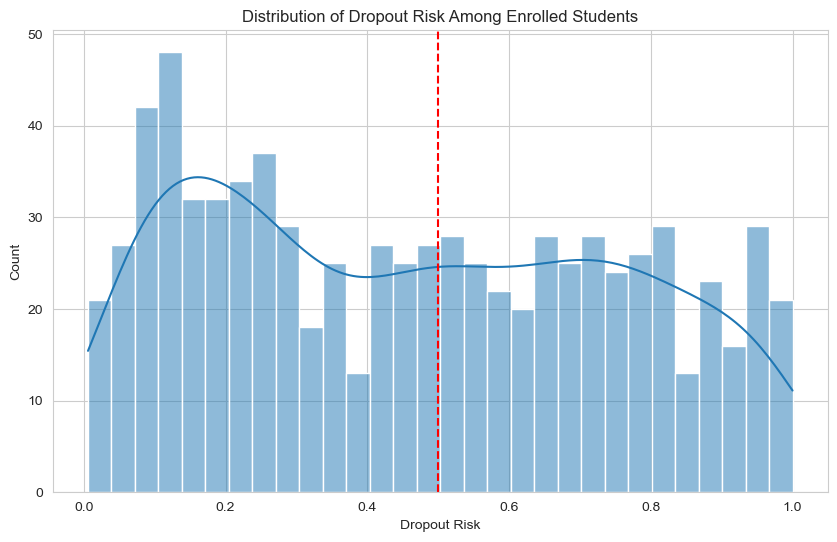

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

dropout_graduated_df = student_data[student_data['Target'].isin(['Dropout', 'Graduate'])]
enrolled_df = student_data[student_data['Target'] == 'Enrolled']

X= dropout_graduated_df.drop(columns=['Target'])
Y = dropout_graduated_df['Target']
X_enrolled = enrolled_df.drop(columns=['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_enrolled)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=enrolled_df.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()

In [32]:
daytime_dropout_graduate = dropout_graduated_df[dropout_graduated_df['Daytime/evening attendance\t'] == 1]
evening_dropout_graduate = dropout_graduated_df[dropout_graduated_df['Daytime/evening attendance\t'] == 0]

daytime_enrolled = enrolled_df[enrolled_df['Daytime/evening attendance\t'] == 1]
evening_enrolled = enrolled_df[enrolled_df['Daytime/evening attendance\t'] == 0]

Accuracy: 0.8937160589604345


              precision    recall  f1-score   support

     Dropout       0.88      0.83      0.85       964
    Graduate       0.90      0.93      0.92      1614

    accuracy                           0.89      2578
   macro avg       0.89      0.88      0.89      2578
weighted avg       0.89      0.89      0.89      2578



[[ 803  161]
 [ 113 1501]]

Top 10 most important features:
                                  Feature  Importance
0     Curricular units 2nd sem (approved)    0.209455
1        Curricular units 2nd sem (grade)    0.123880
2     Curricular units 1st sem (approved)    0.119795
3        Curricular units 1st sem (grade)    0.066484
4                 Tuition fees up to date    0.047329
5                       Age at enrollment    0.035588
6          Previous qualification (grade)    0.032319
7  Curricular units 2nd sem (evaluations)    0.031186
8                         Admission grade    0.030769
9  Curricular units 1st sem (evaluations

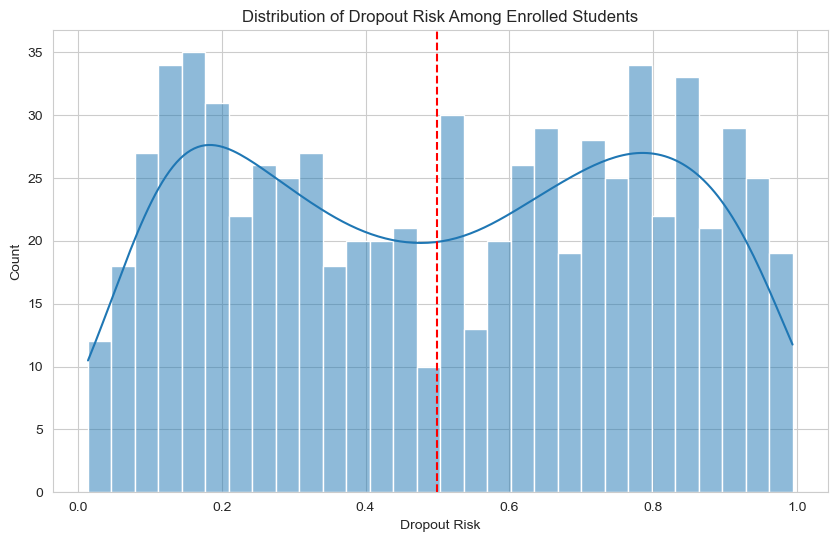

In [33]:
X= daytime_dropout_graduate.drop(columns=['Target'])
Y = daytime_dropout_graduate['Target']
X_daytime_enrolled = daytime_enrolled.drop(columns=['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_daytime_enrolled)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_daytime_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=daytime_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()

In [34]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe_model = RandomForestClassifier(n_estimators=500, random_state=42)
rfe = RFE(rfe_model, n_features_to_select=30)
rfe.fit(X_train, y_train)


rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)


Selected Features by RFE:
Index(['Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', 'Mothers qualification', 'Fathers qualification',
       'Mothers occupation', 'Fathers occupation', 'Admission grade',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')


In [35]:
from sklearn.feature_selection import mutual_info_classif
X, Y = daytime_dropout_graduate.drop(columns=['Target']), daytime_dropout_graduate['Target']

# Calculate Information Gain using mutual_info_classif
info_gain = mutual_info_classif(X, Y)
print("Information Gain for each feature:", info_gain)

# Get feature names
feature_names = X.columns.tolist()
# Sort features by information gain (highest to lowest)
feature_gain_pairs = list(zip(feature_names, info_gain))
sorted_features = sorted(feature_gain_pairs, key=lambda x: x[1], reverse=True)

print("Features ranked by Information Gain (highest to lowest):")
print("-" * 60)
for i, (feature, gain) in enumerate(sorted_features, 1):
    print(f"{i:2d}. {feature:<35}: {gain:.6f}")

print()

# Show top 5 most informative features
print("Top 5 Most Informative Features:")
print("-" * 40)
for i, (feature, gain) in enumerate(sorted_features[:5], 1):
    print(f"{i}. {feature}: {gain:.6f}")

Information Gain for each feature: [0.01009091 0.05252094 0.00217412 0.05505142 0.00676748 0.04807259
 0.06062853 0.00056417 0.01819509 0.01161037 0.01393394 0.01044236
 0.038132   0.00854594 0.         0.04507684 0.09138787 0.02618732
 0.04690254 0.05758158 0.02223174 0.00333804 0.04017135 0.06835331
 0.24446515 0.18079271 0.00716717 0.         0.05216556 0.09442144
 0.31505115 0.24575431 0.00881503 0.         0.00696272 0.01333898]
Features ranked by Information Gain (highest to lowest):
------------------------------------------------------------
 1. Curricular units 2nd sem (approved): 0.315051
 2. Curricular units 2nd sem (grade)   : 0.245754
 3. Curricular units 1st sem (approved): 0.244465
 4. Curricular units 1st sem (grade)   : 0.180793
 5. Curricular units 2nd sem (evaluations): 0.094421
 6. Tuition fees up to date            : 0.091388
 7. Curricular units 1st sem (evaluations): 0.068353
 8. Previous qualification (grade)     : 0.060629
 9. Age at enrollment                 

Accuracy: 0.8921644685802949


              precision    recall  f1-score   support

     Dropout       0.87      0.84      0.85       964
    Graduate       0.90      0.93      0.91      1614

    accuracy                           0.89      2578
   macro avg       0.89      0.88      0.88      2578
weighted avg       0.89      0.89      0.89      2578



[[ 805  159]
 [ 119 1495]]

Top 5 most important features:
                               Feature  Importance
0  Curricular units 2nd sem (approved)    0.226652
1     Curricular units 2nd sem (grade)    0.123472
2  Curricular units 1st sem (approved)    0.109515
3     Curricular units 1st sem (grade)    0.071977
4              Tuition fees up to date    0.042564


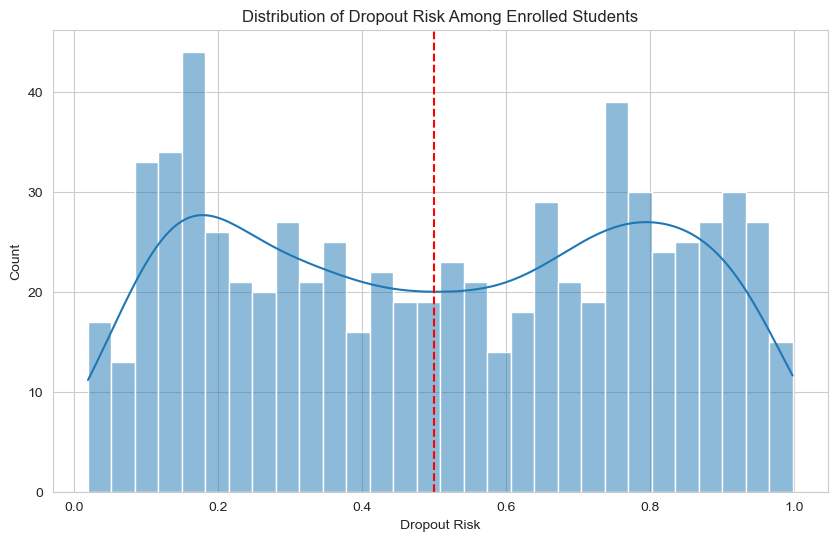

In [36]:
X = daytime_dropout_graduate[['Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', 'Mothers qualification', 'Fathers qualification',
       'Mothers occupation', 'Fathers occupation', 'Admission grade',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate',
       'Inflation rate', 'GDP']]
Y = daytime_dropout_graduate['Target']
X_daytime_enrolled = daytime_enrolled[['Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', 'Mothers qualification', 'Fathers qualification',
       'Mothers occupation', 'Fathers occupation', 'Admission grade',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate',
       'Inflation rate', 'GDP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 5 most important features:")
print(top_features.head(5))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_daytime_enrolled)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_daytime_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=daytime_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()

Accuracy: 0.8899082568807339


              precision    recall  f1-score   support

     Dropout       0.97      0.81      0.89       171
    Graduate       0.83      0.97      0.89       156

    accuracy                           0.89       327
   macro avg       0.90      0.89      0.89       327
weighted avg       0.90      0.89      0.89       327



[[139  32]
 [  4 152]]

Top 10 most important features:
                                  Feature  Importance
0     Curricular units 2nd sem (approved)    0.165920
1     Curricular units 1st sem (approved)    0.159066
2        Curricular units 2nd sem (grade)    0.122879
3        Curricular units 1st sem (grade)    0.100109
4                 Tuition fees up to date    0.049112
5  Curricular units 2nd sem (evaluations)    0.041216
6          Previous qualification (grade)    0.031269
7                       Age at enrollment    0.029581
8  Curricular units 1st sem (evaluations)    0.029154
9                          Inflation rate   

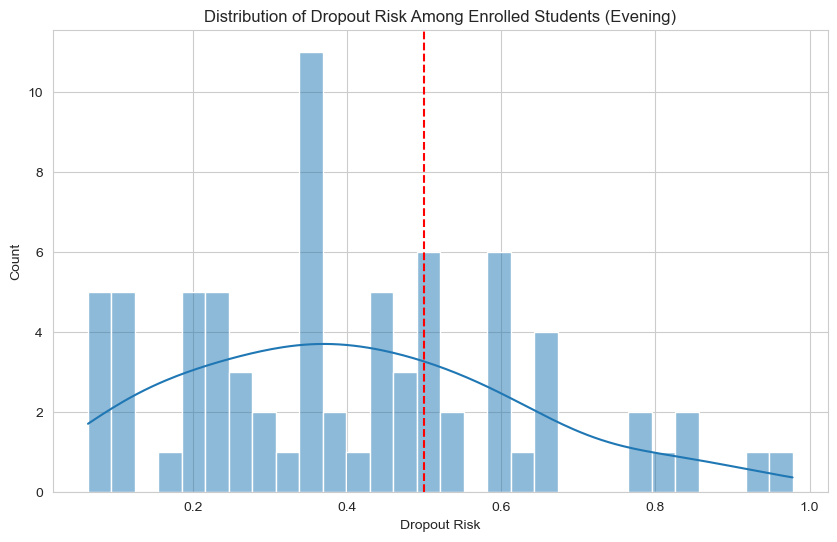


Selected Features by RFE:
Index(['Marital status', 'Application mode', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],

In [51]:
X= evening_dropout_graduate.drop(columns=['Target'])
Y = evening_dropout_graduate['Target']
X_enrolled_evening = evening_enrolled.drop(columns=['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_enrolled_evening)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_enrolled_evening)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=evening_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students (Evening)')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe_model = RandomForestClassifier(n_estimators=500, random_state=42)
rfe = RFE(rfe_model, n_features_to_select=30)
rfe.fit(X_train, y_train)


rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)

In [38]:
from sklearn.feature_selection import mutual_info_classif
X, Y = evening_dropout_graduate.drop(columns=['Target']), evening_dropout_graduate['Target']

# Calculate Information Gain using mutual_info_classif
info_gain = mutual_info_classif(X, Y)
# Get feature names
feature_names = X.columns.tolist()
# Sort features by information gain (highest to lowest)
feature_gain_pairs = list(zip(feature_names, info_gain))
sorted_features = sorted(feature_gain_pairs, key=lambda x: x[1], reverse=True)

print("Features ranked by Information Gain (highest to lowest):")
print("-" * 60)
for i, (feature, gain) in enumerate(sorted_features, 1):
    print(f"{i:2d}. {feature:<35}: {gain:.6f}")

print()

# Show top 5 most informative features
print("Top 5 Most Informative Features:")
print("-" * 40)
for i, (feature, gain) in enumerate(sorted_features[:5], 1):
    print(f"{i}. {feature}: {gain:.6f}")

Features ranked by Information Gain (highest to lowest):
------------------------------------------------------------
 1. Curricular units 2nd sem (approved): 0.411338
 2. Curricular units 1st sem (approved): 0.368011
 3. Curricular units 1st sem (grade)   : 0.346185
 4. Curricular units 2nd sem (grade)   : 0.275134
 5. Tuition fees up to date            : 0.149295
 6. Curricular units 2nd sem (evaluations): 0.115140
 7. Curricular units 1st sem (enrolled): 0.095097
 8. Course                             : 0.071654
 9. Curricular units 2nd sem (enrolled): 0.064853
10. Curricular units 2nd sem (credited): 0.061059
11. Curricular units 1st sem (evaluations): 0.057167
12. Fathers occupation                 : 0.032851
13. Admission grade                    : 0.030772
14. Unemployment rate                  : 0.030076
15. Age at enrollment                  : 0.027668
16. Application mode                   : 0.026378
17. Gender                             : 0.022383
18. Displaced             

Accuracy: 0.8868501529051988


              precision    recall  f1-score   support

     Dropout       0.97      0.81      0.88       171
    Graduate       0.83      0.97      0.89       156

    accuracy                           0.89       327
   macro avg       0.90      0.89      0.89       327
weighted avg       0.90      0.89      0.89       327



[[139  32]
 [  5 151]]

Top 2 most important features:
                               Feature  Importance
0  Curricular units 2nd sem (approved)    0.165723
1  Curricular units 1st sem (approved)    0.153900


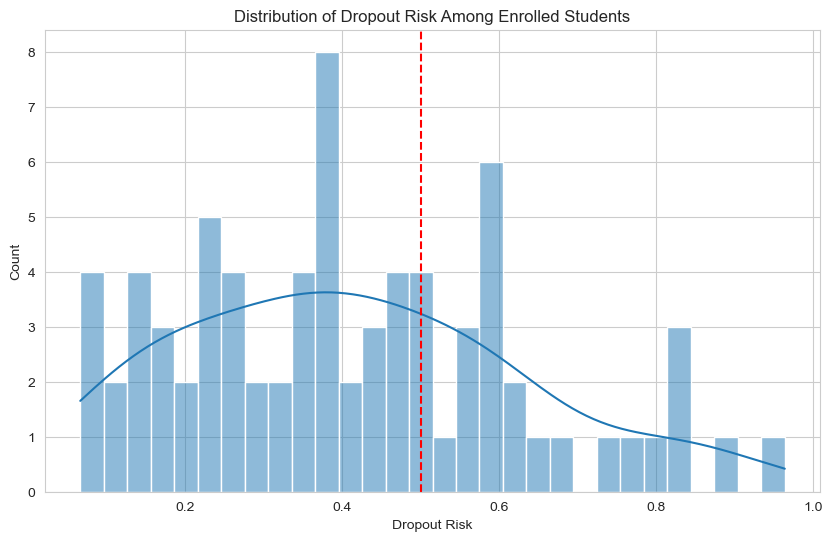

In [52]:
X= evening_dropout_graduate[['Marital status', 'Application mode', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']]
Y = evening_dropout_graduate['Target']
X_enrolled_evening = evening_enrolled[['Marital status', 'Application mode', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Admission grade', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 2 most important features:")
print(top_features.head(2))

 # Predict on enrolled students
dropout_probs = rf_classifier.predict_proba(X_enrolled_evening)[:, 0]  # Probability of dropout
grad_probs = rf_classifier.predict_proba(X_enrolled_evening)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=evening_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()

Accuracy: 0.8968192397207138


              precision    recall  f1-score   support

     Dropout       0.88      0.84      0.86       964
    Graduate       0.91      0.93      0.92      1614

    accuracy                           0.90      2578
   macro avg       0.89      0.89      0.89      2578
weighted avg       0.90      0.90      0.90      2578



[[ 813  151]
 [ 115 1499]]

Top 10 most important features:
                        Feature  Importance
0                Marital status    0.294986
1              Application mode    0.271029
2                        Course    0.203344
3             Application order    0.189771
4  Daytime/evening attendance\t    0.040870


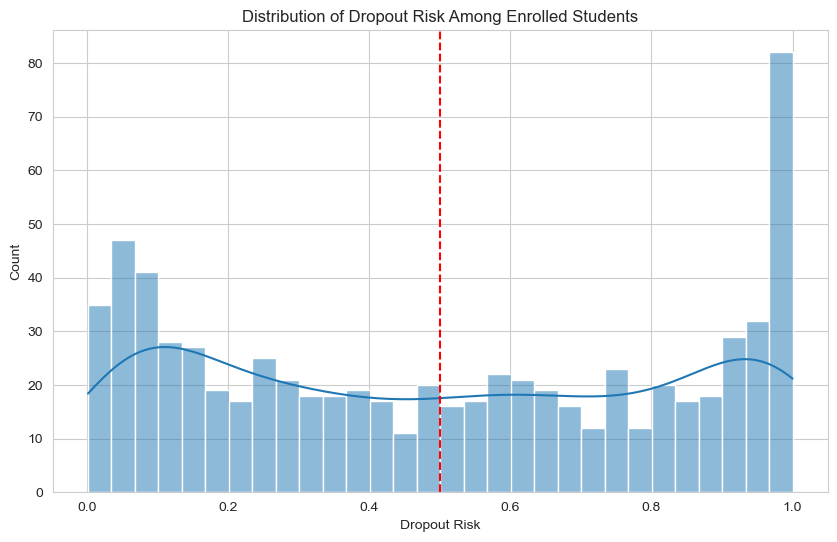

Features ranked by Information Gain (highest to lowest):
------------------------------------------------------------
 1. Curricular units 2nd sem (approved): 0.312845
 2. Curricular units 1st sem (approved): 0.251397
 3. Curricular units 2nd sem (grade)   : 0.244624
 4. Curricular units 1st sem (grade)   : 0.179817
 5. Tuition fees up to date            : 0.090259
 6. Curricular units 1st sem (evaluations): 0.084050
 7. Curricular units 2nd sem (evaluations): 0.079234
 8. Scholarship holder                 : 0.065581
 9. Age at enrollment                  : 0.061137
10. Application mode                   : 0.058898
11. Course                             : 0.055012
12. Admission grade                    : 0.048841
13. Previous qualification (grade)     : 0.047696
14. Curricular units 2nd sem (enrolled): 0.047609
15. Debtor                             : 0.045852
16. Curricular units 1st sem (enrolled): 0.041652
17. Mothers occupation                 : 0.040417
18. Previous qualification

In [40]:
from sklearn.feature_selection import mutual_info_classif
X_2= daytime_dropout_graduate.drop(columns=['Target'])
Y_2 = daytime_dropout_graduate['Target']
X_daytime_enrolled = daytime_enrolled.drop(columns=['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_2, Y_2, test_size=0.8, random_state=42)

# Create a multinomial logistic regression model
daytime_model = LogisticRegression(solver='lbfgs', max_iter = 10000)

# Train the classifier
daytime_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = daytime_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = daytime_model.predict_proba(X_daytime_enrolled)[:, 0]  # Probability of dropout
grad_probs = daytime_model.predict_proba(X_daytime_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=daytime_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()

# Calculate Information Gain using mutual_info_classif
info_gain = mutual_info_classif(X_2, Y_2)

# Get feature names
feature_names = X_2.columns.tolist()
# Sort features by information gain (highest to lowest)
feature_gain_pairs = list(zip(feature_names, info_gain))
sorted_features = sorted(feature_gain_pairs, key=lambda x: x[1], reverse=True)

print("Features ranked by Information Gain (highest to lowest):")
print("-" * 60)
for i, (feature, gain) in enumerate(sorted_features, 1):
    print(f"{i:2d}. {feature:<35}: {gain:.6f}")

print()

# Show top 5 most informative features
print("Top 5 Most Informative Features:")
print("-" * 40)
for i, (feature, gain) in enumerate(sorted_features[:5], 1):
    print(f"{i}. {feature}: {gain:.6f}")

Accuracy: 0.8440366972477065


              precision    recall  f1-score   support

     Dropout       0.88      0.81      0.84       171
    Graduate       0.81      0.88      0.84       156

    accuracy                           0.84       327
   macro avg       0.85      0.85      0.84       327
weighted avg       0.85      0.84      0.84       327



[[139  32]
 [ 19 137]]

Top 10 most important features:
                        Feature  Importance
0                Marital status    0.294986
1              Application mode    0.271029
2                        Course    0.203344
3             Application order    0.189771
4  Daytime/evening attendance\t    0.040870


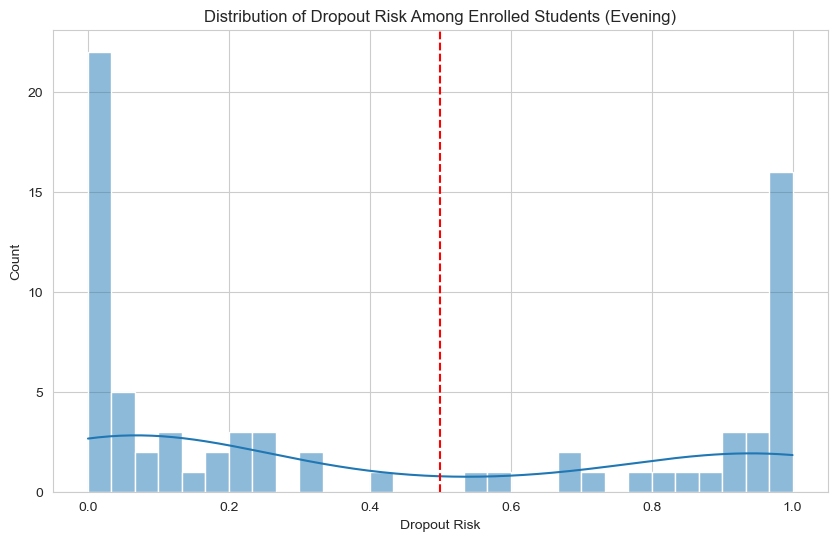

In [41]:
X= evening_dropout_graduate.drop(columns=['Target'])
Y = evening_dropout_graduate['Target']
X_evening_enrolled = evening_enrolled.drop(columns=['Target'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a multinomial logistic regression model
evening_model = LogisticRegression(solver='lbfgs', max_iter = 10000)

# Train the classifier
evening_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = evening_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))
    
# Get feature importance
features = X_train.columns
indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
'Feature': features[indices],
'Importance': importances[indices]
 })
    
print("\nTop 10 most important features:")
print(top_features.head(10))

 # Predict on enrolled students
dropout_probs = evening_model.predict_proba(X_evening_enrolled)[:, 0]  # Probability of dropout
grad_probs = evening_model.predict_proba(X_evening_enrolled)[:, 1]     # Probability of graduation
    
# Create results dataframe
results = pd.DataFrame({
    'dropout_risk': dropout_probs,
    'graduation_probability': grad_probs
}, index=evening_enrolled.index)
    
# Add predicted class (using 0.5 threshold by default)
results['predicted_outcome'] = ['dropout' if p >= 0.5 else 'graduated' for p in dropout_probs]
plt.figure(figsize=(10, 6))
sns.histplot(results['dropout_risk'], bins=30, kde=True)
plt.axvline(x=0.5, color='red', linestyle='--')
plt.title('Distribution of Dropout Risk Among Enrolled Students (Evening)')
plt.xlabel('Dropout Risk')
plt.ylabel('Count')
plt.show()